In [16]:
import glob
import pandas as pd
import pendulum

from datetime import datetime
import matplotlib.pyplot as plt
import data_jam.models as m
from peewee import fn
from IPython.core.pylabtools import figsize

In [3]:
x = m.ServiceRequest().select(fn.Distinct(m.ServiceRequest.type)).tuples()

Service Types

In [5]:
for i in x:
    print(i)

('Damaged Tree',)
('Smoking',)
('DOOR/WINDOW',)
('ATF',)
('Laboratory',)
('Drinking Water',)
('HEATING',)
('Fire Alarm - Modification',)
('DOF Parking - Request Copy',)
('Discipline and Suspension',)
('Sprinkler - Mechanical',)
('Public Assembly',)
('Comments',)
('Derelict Bicycle',)
('Home Repair',)
('DFTA Literature Request',)
('No Child Left Behind',)
('Asbestos',)
('Emergency Response Team (ERT)',)
('Illegal Animal Sold',)
('Beach/Pool/Sauna Complaint',)
('Sweeping/Missed',)
('VACANT APARTMENT',)
('Cranes and Derricks',)
('Cable Complaint',)
('Parking Card',)
('Missed Collection (All Materials)',)
('DOF Parking - DMV Clearance',)
('CONSTRUCTION',)
('DOF Parking - Address Update',)
('Fire Alarm - Reinspection',)
('Derelict Vehicle',)
('Window Guard',)
('DHS Income Savings Requirement',)
('DOF Property - RPIE Issue',)
('Animal in a Park',)
('DOT Literature Request',)
('Lead',)
('Plant',)
('SRDE',)
('Gas Station Discharge Lines',)
('Cooling Tower',)
('DHS Advantage - Third Party',)
('

Load Weather Data

In [8]:
path = 'data/weather/'
all_files = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in all_files:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
weather_df = pd.concat(list_)

In [10]:
weather_df.head(n=10)

,Date,DP_avg,DP_high,DP_low,Day,H_avg,H_high,H_low,P_avg,P_high,...,V_avg,V_high,V_low,W_avg,W_high,W_low,event,Month,Year,Date.1
0,2010-01-01,32.0,34.0,27.0,1,85.0,100.0,70.0,29.89,30.01,...,6.0,10.0,2.0,16.0,22.0,3.0,Snow,Jan,2010,2010-01-01
1,2010-01-02,14.0,24.0,3.0,2,68.0,85.0,50.0,29.67,29.72,...,8.0,10.0,2.0,22.0,35.0,13.0,Snow,Jan,2010,2010-01-02
2,2010-01-03,7.0,10.0,3.0,3,56.0,67.0,45.0,29.54,29.65,...,9.0,10.0,2.0,26.0,39.0,14.0,Snow,Jan,2010,2010-01-03
3,2010-01-04,10.0,12.0,8.0,4,53.0,62.0,43.0,29.70,29.75,...,10.0,10.0,10.0,17.0,24.0,11.0,\t,Jan,2010,2010-01-04
4,2010-01-05,12.0,14.0,9.0,5,56.0,65.0,47.0,29.71,29.75,...,10.0,10.0,10.0,17.0,24.0,10.0,\t,Jan,2010,2010-01-05
5,2010-01-06,15.0,19.0,12.0,6,58.0,69.0,47.0,29.72,29.79,...,10.0,10.0,10.0,20.0,30.0,10.0,Snow,Jan,2010,2010-01-06
6,2010-01-07,21.0,23.0,19.0,7,61.0,69.0,52.0,29.86,29.93,...,10.0,10.0,10.0,16.0,22.0,9.0,\t,Jan,2010,2010-01-07
7,2010-01-08,22.0,27.0,10.0,8,71.0,92.0,50.0,29.76,29.88,...,6.0,10.0,1.0,22.0,30.0,8.0,Snow,Jan,2010,2010-01-08
8,2010-01-09,5.0,10.0,-1.0,9,47.0,62.0,31.0,30.06,30.19,...,10.0,10.0,10.0,17.0,24.0,9.0,\t,Jan,2010,2010-01-09
9,2010-01-10,2.0,6.0,-1.0,10,43.0,55.0,31.0,30.22,30.28,...,10.0,10.0,10.0,13.0,17.0,7.0,\t,Jan,2010,2010-01-10


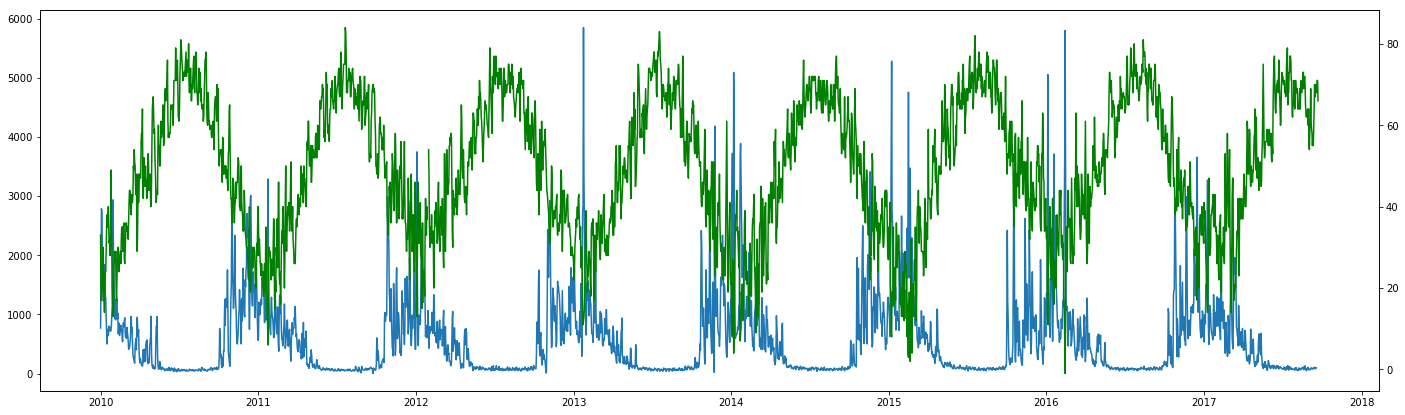

In [19]:
figsize(24, 7)

fig, ax1 = plt.subplots()

start = pendulum.create(2000, 10, 22, 0, 0, 0, 0, 'America/New_York')
end = pendulum.create(2017, 9, 22, 23, 59, 59, 0, 'America/New_York')
calls = list(m.ServiceRequest.count_by_day_and_type(start, end, ['HEAT/HOT WATER', 'HEATING']))

weather_dates = [datetime.strptime(x, '%Y-%m-%d') for x in list(weather_df.Date.values)]
weather_values = [x for x in list(weather_df.T_low.values)]

ax1.plot([call[0] for call in calls],  [call[1] for call in calls])
ax2 = ax1.twinx()
ax2.plot(weather_dates, weather_values, 'g')

plt.xticks(rotation=90)
plt.show()